# 3- Data Standardization & Preprocessing

Written by Jess Breda

## 3.1 What is Standardization?

Standardization is a preprocessing technique used to scale the features of a dataset so that they have a mean of 0 and a standard deviation of 1. This process transforms the distribution of each feature to a standard normal distribution. This is crucial in machine learning as it ensures that each feature contributes equally to the analysis, preventing features with larger scales from dominating the model's predictions. Standardization is especially important for algorithms that calculate distances between data points, such as k-nearest neighbors (KNN) and support vector machines (SVMs), and for optimization algorithms that assume data is centered, like gradient descent.

Let's start by visualizing what happens to out data when it's standardized. 


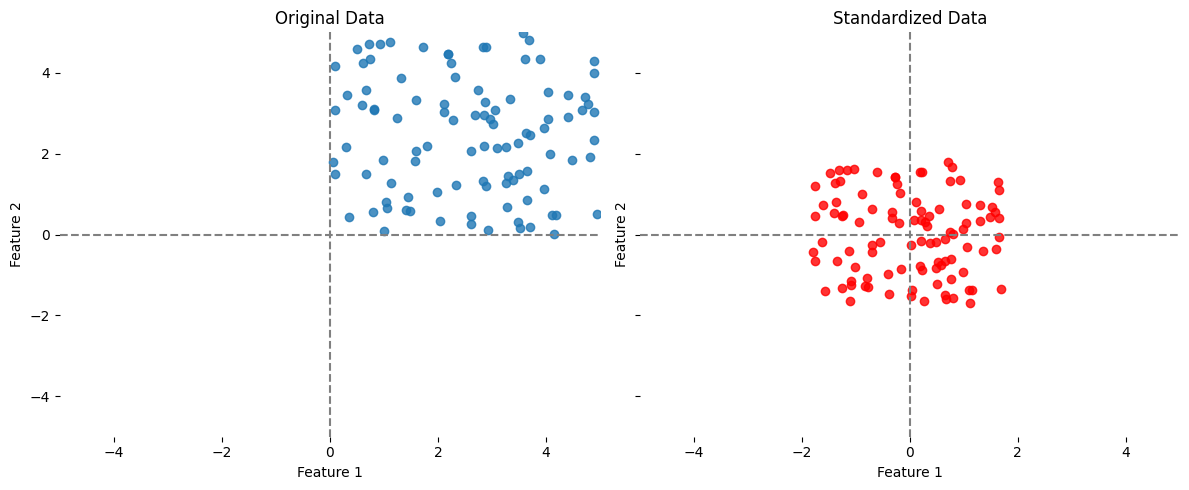

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Generate a random dataset with 2 features
np.random.seed(0)  # For reproducibility
X = np.random.rand(100, 2) * 5  # 100 samples, 2 features, values between 0 and 5

# Standardize the dataset
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# Plotting
for a in ax:
    a.axhline(0, color="gray", linestyle="--")  # Add horizontal grid line for y=0
    a.axvline(0, color="gray", linestyle="--")  # Add vertical grid line for x=0

# Original Data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.8)
ax[0].set_title("Original Data")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[0].set_xlim(-3, 5)
ax[0].set_ylim(-3, 5)

# Standardized Data
ax[1].scatter(X_standardized[:, 0], X_standardized[:, 1], alpha=0.8, color="red")
ax[1].set_title("Standardized Data")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")
ax[1].set_xlim(-5, 5)
ax[1].set_ylim(-5, 5)

plt.tight_layout()
sns.despine(left=True, bottom=True)

We can see that the non-standardized data (blue) is distributed in only the positive range and has a large spread. After standardization (red) the data lies around the origin (mean 0) and has a much smaller spread (std = 1).




## 3.2 Why is it important?

The importance of standardization can be illustrated with an example. Imagine we are building a model to predict house prices based on features like square footage and number of bedrooms. If these features are on vastly different scales (e.g., square footage in the thousands and number of bedrooms ranging from 1 to 5), models that rely on distance calculations or gradient descent will unfairly weigh the features, leading to suboptimal model performance. 

Without standardization, the feature with the larger scale (square footage) will dominate the model, potentially overshadowing the contribution of other important features (like the number of bedrooms). This imbalance can lead to less accurate predictions, as the model may not adequately learn the nuances of the data. Standardizing these features ensures that each one contributes proportionally to the final prediction, improving model accuracy and convergence speed during training.

### Train Linear Model 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate dataset of square footage, n bedroooms, and house price
np.random.seed(0)
square_footage = np.random.randint(
    1000, 10000, size=100
)  # Square footage in the thousands
number_of_bedrooms = np.random.randint(1, 6, size=100)  # Number of bedrooms from 1 to 5

# Target variable: House prices, somewhat correlated with square footage and number of bedrooms
house_prices = (
    square_footage * 300
    + number_of_bedrooms * 50000
    + np.random.randint(50000, 100000, size=100)
)

# Combine features into a single dataset
X = np.column_stack((square_footage, number_of_bedrooms))
y = house_prices

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a linear regression model without standardization
lr = LinearRegression()
lr.fit(X_train, y_train)
coefficients_without_standardization = lr.coef_
y_pred = lr.predict(X_test)
mse_non_standardized = mean_squared_error(y_test, y_pred)

# Standardize the features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Train a linear regression model with standardization
lr_standardized = LinearRegression()
lr_standardized.fit(X_train_standardized, y_train)
coefficients_with_standardization = lr_standardized.coef_
y_pred_standardized = lr_standardized.predict(X_test_standardized)
mse_standardized = mean_squared_error(y_test, y_pred_standardized)

### Compare

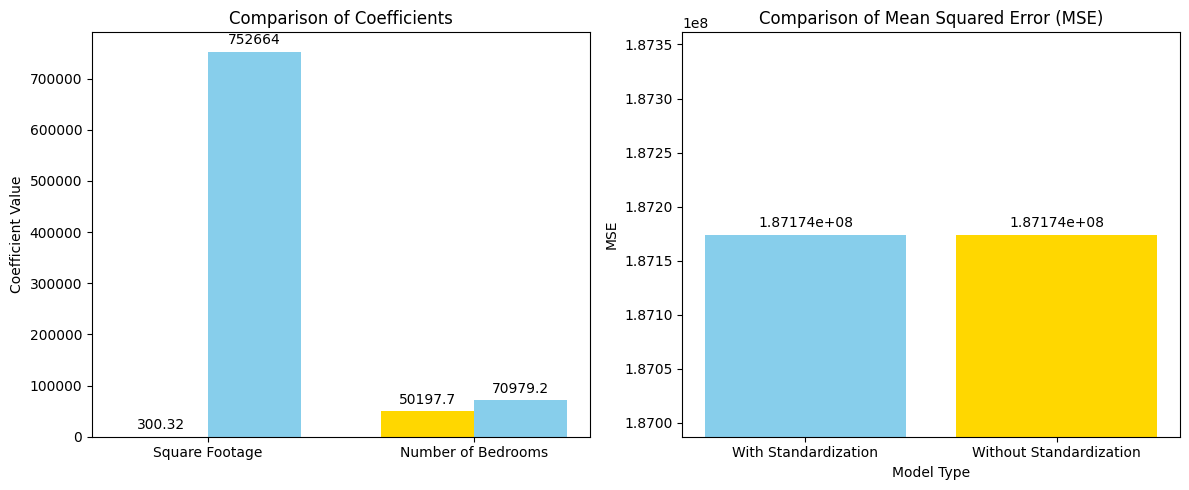

In [23]:
# Plotting the comparison of coefficients
labels = ["Square Footage", "Number of Bedrooms"]
coefficients_without_standardization = [300.32, 50197.70]
coefficients_with_standardization = [752664.15, 70979.17]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
rects1 = ax[0].bar(
    x - width / 2,
    coefficients_without_standardization,
    width,
    label="Without Standardization",
    color="gold",
)
rects2 = ax[0].bar(
    x + width / 2,
    coefficients_with_standardization,
    width,
    label="With Standardization",
    color="skyblue",
)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set(
    ylabel="Coefficient Value",
    title="Comparison of Coefficients",
    xticks=x,
    xticklabels=labels,
)
ax[0].bar_label(rects1, padding=3)
ax[0].bar_label(rects2, padding=3)


labels = ["With Standardization", "Without Standardization"]
mse_values = [mse_standardized, mse_non_standardized]

ax[1].bar(labels, mse_values, color=["skyblue", "gold"])
ax[1].set(
    ylim=[min(mse_values) * 0.999, max(mse_values) * 1.001],
    title="Comparison of Mean Squared Error (MSE)",
    ylabel="MSE",
    xlabel="Model Type",
    xticks=x,
)

ax[1].bar_label(ax[1].containers[0], padding=3)


fig.tight_layout()

The coefficients from the model trained without standardization show that the number of bedrooms has a much larger weight compared to square footage, reflecting the original scales of these features. This imbalance could lead to suboptimal model performance, as the model might overemphasize the importance of the number of bedrooms due to its larger numerical scale. However in this simple linear model, the MSE (right) is similar for both models.

After standardization, the coefficients reflect the importance of each feature on a comparable scale. While the absolute values of the coefficients have changed significantly and may seem less intuitive, they indicate that the model can now evaluate the contribution of each feature more equitably. This is crucial for models that rely on gradient descent for optimization, as it can lead to faster convergence and potentially more accurate predictions by appropriately balancing the influence of each feature.

This example illustrates the importance of standardization in ensuring that features contribute proportionally to the model's predictions, enhancing model accuracy and the speed of training convergence.


## 3.3 What Different Types of Standardization are There?

Sometimes, the shape or type of your data will require different types of techniques. 

### 1. Min-Max Scaling
Min/max scaling might be preferred over standardization (z-score normalization) in scenarios where the data does not follow a Gaussian distribution or when you need to bound your data within a specific range. For example,  image pixel intensities are in the range [0, 255], and for many image processing tasks, including training neural networks on images, it's common practice to scale these intensities to [0, 1].




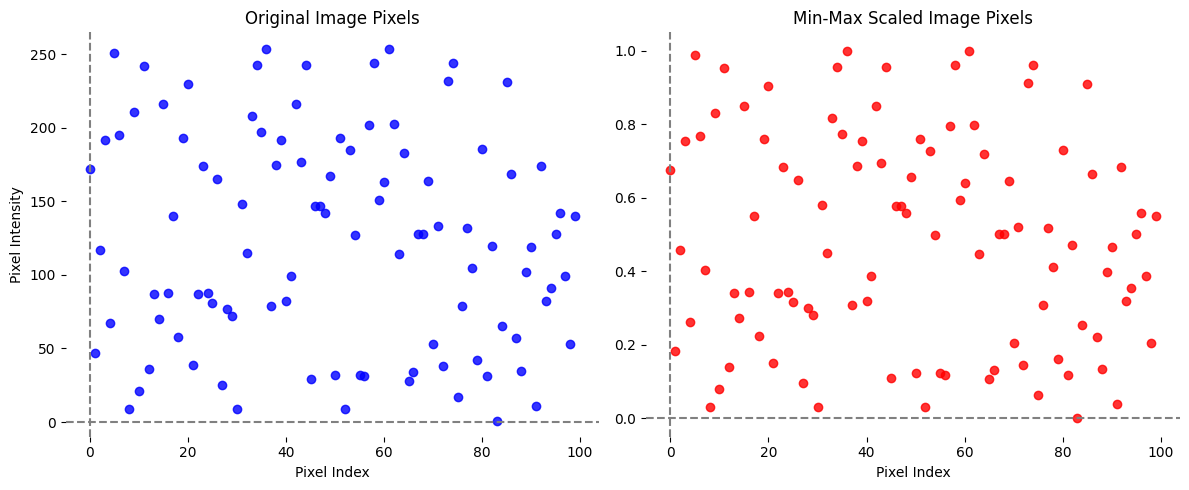

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Simulate image pixel data
np.random.seed(0)  # For reproducibility
image_pixels = np.random.randint(
    0, 256, size=(100, 1)  # 100 pixel values, ranging from 0 to 255
)

# Apply min-max scaling
scaler = MinMaxScaler()
image_pixels_scaled = scaler.fit_transform(image_pixels)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
for a in ax:
    a.axhline(0, color="gray", linestyle="--")  # Add horizontal grid line for y=0
    a.axvline(0, color="gray", linestyle="--")  # Add vertical grid line for x=0

# Original Pixel Data
ax[0].scatter(range(len(image_pixels)), image_pixels, alpha=0.8, color="blue")
ax[0].set_title("Original Image Pixels")
ax[0].set_xlabel("Pixel Index")
ax[0].set_ylabel("Pixel Intensity")
ax[0].set_ylim(-10, 265)

# Scaled Pixel Data
ax[1].scatter(
    range(len(image_pixels_scaled)), image_pixels_scaled, alpha=0.8, color="red"
)
ax[1].set_title("Min-Max Scaled Image Pixels")
ax[1].set_xlabel("Pixel Index")

plt.tight_layout()
sns.despine(left=True, bottom=True)

It can be seen this data has the same exact distribution, it is now just scaled between 0 and 1. 


### 2. Log Transformation & Skewed Data
Log transformation is particularly useful for count data that follows a Poisson distribution or any distribution that is not normal (e.g. income). This transformation can help stabilize the variance and make the data more 'normal' or symmetric, which is particularly useful for linear models. However, it's important to add a constant to the count to avoid the log of zero, which is undefined.


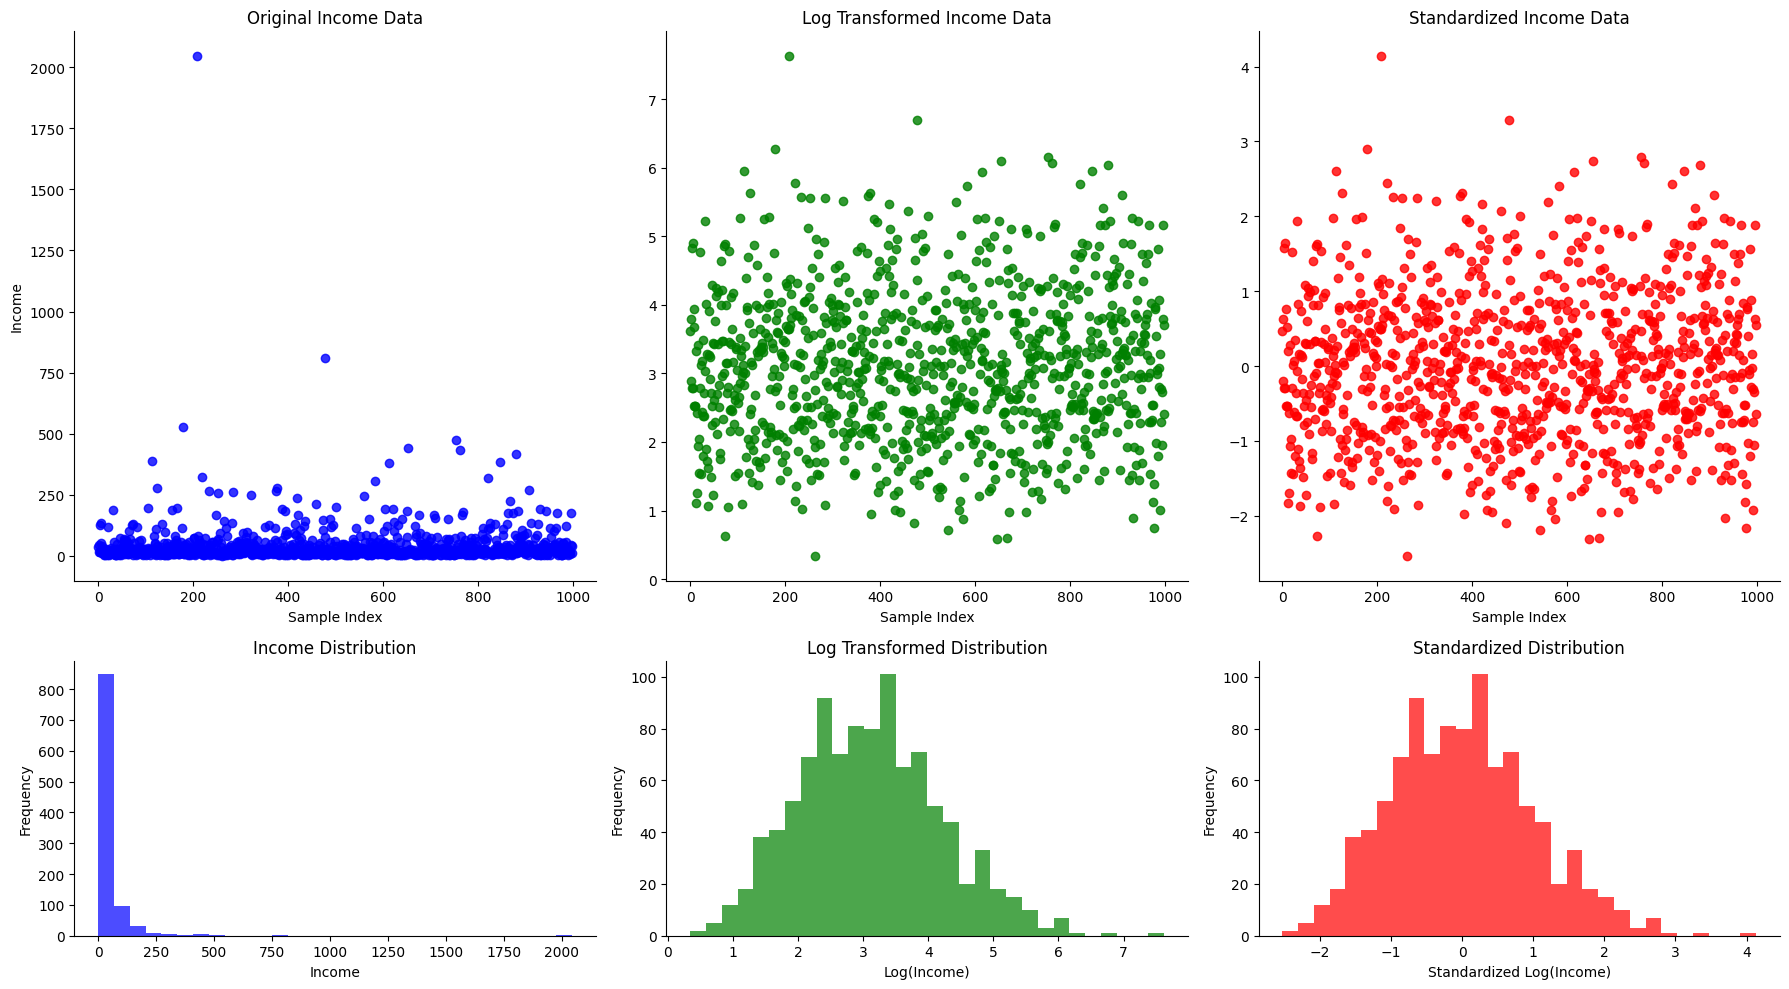

In [21]:
# Generate a different dataset with a strong right skew, simulating income data
np.random.seed(42)
income_data = np.random.lognormal(mean=3, sigma=1.2, size=(1000, 1))

# Apply log transformation followed by standardization to the income data
income_log_transformed = transformer.transform(income_data)
income_mean = income_log_transformed.mean()
income_std = income_log_transformed.std()
income_standardized = (income_log_transformed - income_mean) / income_std

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(18, 10), gridspec_kw={"height_ratios": [2, 1]})

# Original Income Data
axs[0, 0].scatter(range(len(income_data)), income_data, alpha=0.8, color="blue")
axs[0, 0].set_title("Original Income Data")
axs[0, 0].set_xlabel("Sample Index")
axs[0, 0].set_ylabel("Income")
axs[1, 0].hist(income_data, bins=30, color="blue", alpha=0.7)
axs[1, 0].set_title("Income Distribution")
axs[1, 0].set_xlabel("Income")
axs[1, 0].set_ylabel("Frequency")

# Log Transformed Income Data
axs[0, 1].scatter(
    range(len(income_log_transformed)), income_log_transformed, alpha=0.8, color="green"
)
axs[0, 1].set_title("Log Transformed Income Data")
axs[0, 1].set_xlabel("Sample Index")
axs[1, 1].hist(income_log_transformed, bins=30, color="green", alpha=0.7)
axs[1, 1].set_title("Log Transformed Distribution")
axs[1, 1].set_xlabel("Log(Income)")
axs[1, 1].set_ylabel("Frequency")

# Standardized Income Data
axs[0, 2].scatter(
    range(len(income_standardized)), income_standardized, alpha=0.8, color="red"
)
axs[0, 2].set_title("Standardized Income Data")
axs[0, 2].set_xlabel("Sample Index")
axs[1, 2].hist(income_standardized, bins=30, color="red", alpha=0.7)
axs[1, 2].set_title("Standardized Distribution")
axs[1, 2].set_xlabel("Standardized Log(Income)")
axs[1, 2].set_ylabel("Frequency")

plt.tight_layout()
sns.despine()



**Note:** 
Log transforming data before applying linear models has significant implications for the interpretation of the model coefficients (weights). When you apply a log transformation to a predictor variable, to a target variable, or to both, you change the nature and scale of the relationship that the linear model is estimating and this needs to be taken into account when assessing the model. 
### Other methods to know about:
#### 3. Square Root Transformation
Like log transformation, the square root transformation can be used to reduce the skewness of count data, making it more suitable for linear modeling. This method is less aggressive than the log transformation and can be a good choice when the count data includes zeros, as it doesn't require adding a constant before the transformation.

#### 4. Binning / Discretization
For ordinal data like cancer stages, where the count represents a progression (stage 0, stage 1, etc.), binning or discretization can be applied to convert numerical data into categorical. This approach acknowledges the ordinal nature of the data and can be particularly useful if there are non-linear relationships between the stages and the target variable. The data can be converted into categorical bins, and then one-hot encoding can be used to create binary variables for each bin/category, making the data suitable for many types of machine learning models.

#### 5. Custom Transformations
Depending on the specific characteristics of the data and the requirements of the model, custom transformations might be necessary. For instance, one might develop a weighting scheme that reflects the importance or impact of each stage in the context of the model's predictive task.



## Applied to Cancer Dataset